# Data Science jobs

In this project, we shall apply the hierarchical agglomeration clustering method in the [dataset](https://salaries.ai-jobs.net/download/) from the jobseeker website [ai-jobs](https://ai-jobs.net/). The purpose is to cluster job vacancies in the Data Science field by considering experience levels.

## Libraries

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt, colors as mcolors
import scipy.cluster.hierarchy as sch

In [2]:
%matplotlib notebook

## Reading and Cleaning data

In [3]:
#------------ Read and Clean Dataset ------------ #

# Read CSV
df = pd.read_csv("dataset.csv")

# Getting only the relevant columns
df = df[['job_title', 'experience_level']].sort_values('job_title')

# Function to counting entry-level vacancies
def count_exp_level(df, level):
    df = df.value_counts()
    
    if level in df.index: return df[level]
    else: return 0

# Aggregate over entry-level vacancies and average salary
df = df.groupby('job_title').agg(
    EN = ('experience_level', lambda x: count_exp_level(x, 'EN')),
    MI = ('experience_level', lambda x: count_exp_level(x, 'MI')),
    SE = ('experience_level', lambda x: count_exp_level(x, 'SE'))
)

# Select jobs with at least 15 vacancies
df = df.where(df.sum(axis = 1) >= 10).dropna()

df

,EN,MI,SE
job_title,,,
AI Scientist,7.0,3.0,1.0
Analytics Engineer,1.0,7.0,29.0
BI Data Analyst,5.0,6.0,0.0
Data Analyst,24.0,44.0,111.0
Data Architect,0.0,3.0,34.0
Data Engineer,18.0,81.0,199.0
Data Science Manager,0.0,4.0,21.0
Data Scientist,36.0,84.0,206.0
ETL Developer,0.0,2.0,8.0


## Dendrogram (Scipy Library)

<IPython.core.display.Javascript object>


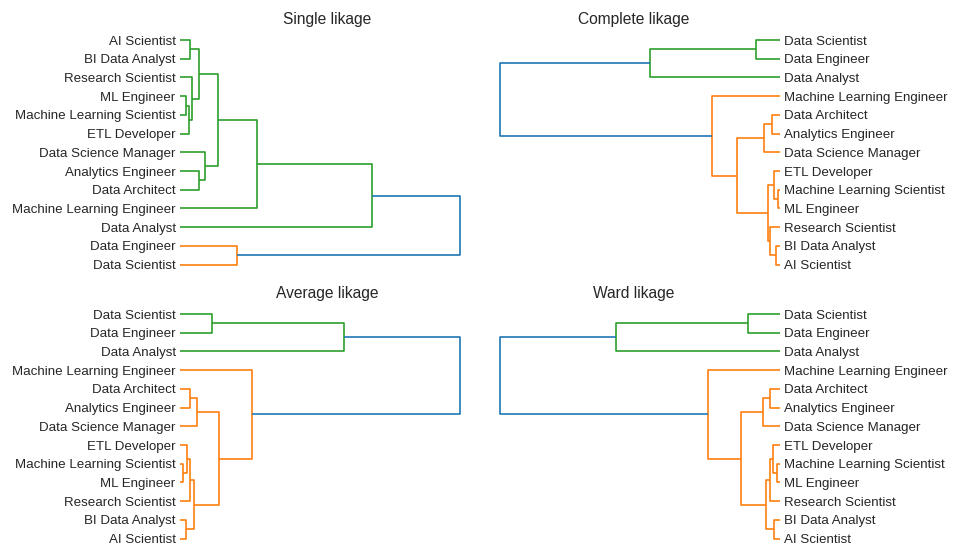

In [8]:
# Subplots
#plt.figure()
fig, axs = plt.subplots(2, 2, figsize = (12, 7), dpi = 80)
plt.style.use('seaborn-white')

# Remove spines
for row_ax in axs:
    for ax in row_ax:
        ax.spines[:].set_visible(False)
        ax.set_yticks([])
        ax.set_xticks([])

# Single linkage
axs[0,0].set_title('Single likage', loc = 'center', fontsize = 14)
dendrogram = sch.dendrogram(
    sch.linkage(df, method = 'single', optimal_ordering = True), 
    orientation = 'right',
    labels = df.index,
    ax = axs[0,0]
)

# Complete linkage
axs[0,1].set_title('Complete likage', loc = 'center', fontsize = 14)
dendrogram = sch.dendrogram(
    sch.linkage(df, method = 'complete', optimal_ordering = True), 
    orientation = 'left',
    labels = df.index,
    ax = axs[0,1]
)

# Complete linkage
axs[1,0].set_title('Average likage', loc = 'center', fontsize = 14)
dendrogram = sch.dendrogram(
    sch.linkage(df, method = 'average', optimal_ordering = True), 
    orientation = 'right',
    labels = df.index,
    ax = axs[1,0]
)

# Complete linkage
axs[1,1].set_title('Ward likage', loc = 'center', fontsize = 14)
dendrogram = sch.dendrogram(
    sch.linkage(df, method = 'average', optimal_ordering = True), 
    orientation = 'left',
    labels = df.index,
    ax = axs[1,1]
)

# Set layout
plt.tight_layout()
plt.savefig('dendrograms.png', dpi = 100)
plt.show()